# Problem Statement:
Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban, and rural areas. Customer-first applies for a home loan after that company validates the customer eligibility for a loan.

The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others. To automate this process, they have given a problem to identify the customer's segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.


# Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
train=pd.read_csv("C:\\Users\\mevee\\Downloads\\loan-train.csv")
test=pd.read_csv("C:\\Users\\mevee\\Downloads\\loan-test.csv")

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


# shape

In [5]:
print(train.shape)
print(test.shape)

(614, 13)
(367, 12)


# info

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


# duplicates

In [8]:
train.duplicated().sum()

0

In [9]:
test.duplicated().sum()

0

# drop unnecessary column

In [10]:
train=train.drop(['Loan_ID'],axis=1)

In [11]:
test=test.drop(['Loan_ID'],axis=1)

# unique

In [12]:
for i in train.select_dtypes(include='object'):
    print(i)
    print(train[i].unique())
    print(train[i].value_counts())

Gender
['Male' 'Female' nan]
Male      489
Female    112
Name: Gender, dtype: int64
Married
['No' 'Yes' nan]
Yes    398
No     213
Name: Married, dtype: int64
Dependents
['0' '1' '2' '3+' nan]
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Education
['Graduate' 'Not Graduate']
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Self_Employed
['No' 'Yes' nan]
No     500
Yes     82
Name: Self_Employed, dtype: int64
Property_Area
['Urban' 'Rural' 'Semiurban']
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Loan_Status
['Y' 'N']
Y    422
N    192
Name: Loan_Status, dtype: int64


# isna()

In [13]:
(train.isna().sum()/train.shape[0])*100

Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

<AxesSubplot:>

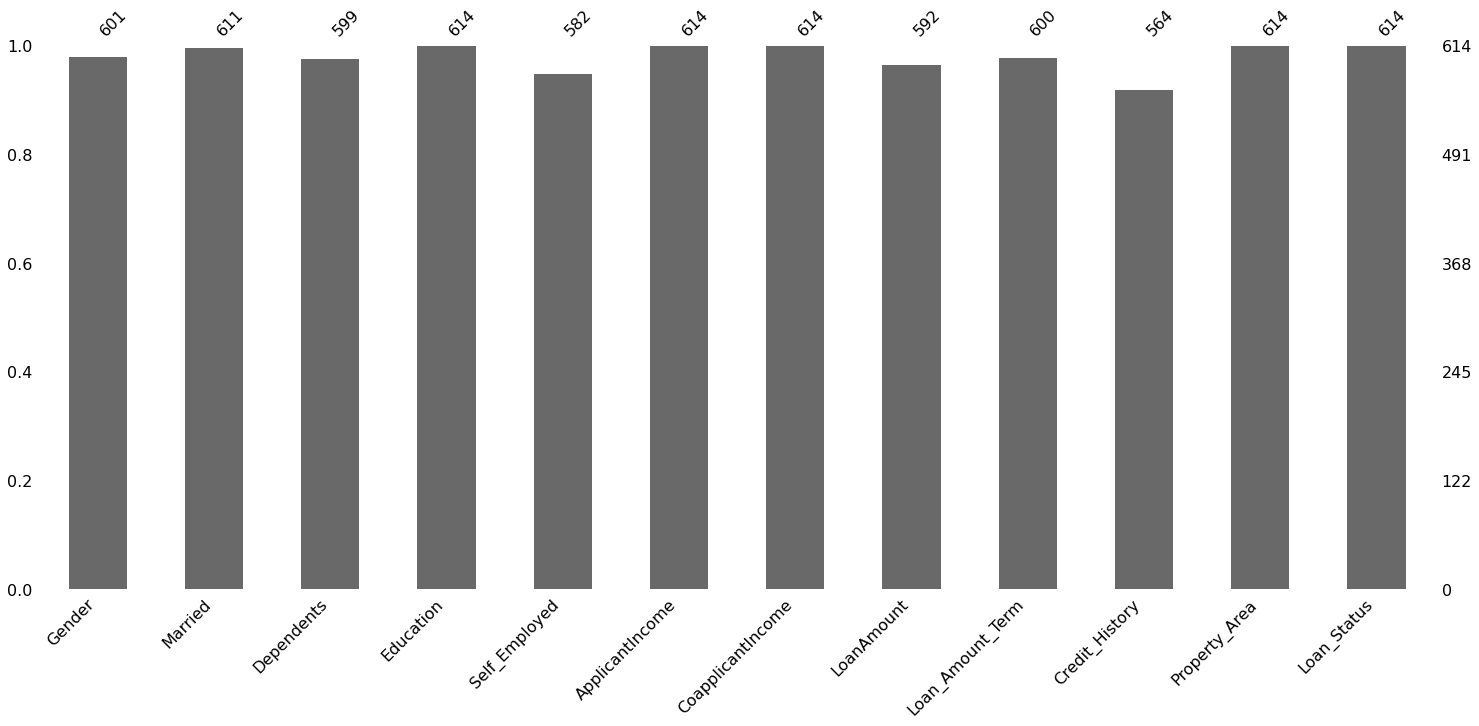

In [14]:
msno.bar(train)

In [15]:
(test.isna().sum()/test.shape[0])*100

Gender               2.997275
Married              0.000000
Dependents           2.724796
Education            0.000000
Self_Employed        6.267030
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           1.362398
Loan_Amount_Term     1.634877
Credit_History       7.901907
Property_Area        0.000000
dtype: float64

# Data cleaning

In [16]:
nan_data=['Gender','Married','Dependents','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History']

In [17]:
for i in nan_data:
    train[i].fillna(train[i].mode()[0],inplace=True)

In [18]:
train.Dependents.value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [19]:
train.Dependents.replace("3+","3",inplace=True)

In [20]:
train['Dependents']=train['Dependents'].astype('int64')

In [21]:
nan_data1=['Gender','Dependents','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History']

In [22]:
for i in nan_data1:
    test[i].fillna(test[i].mode()[0],inplace=True)

In [23]:
test.Dependents.replace("3+","3",inplace=True)

In [24]:
test['Dependents']=test['Dependents'].astype('int64')

# Convert categorical variable with numerical values

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
le=LabelEncoder()

In [27]:
for i in train.select_dtypes(include='object'):
    train[i]=le.fit_transform(train[i])

In [28]:
for i in test.select_dtypes(include='object'):
    test[i]=le.fit_transform(test[i])

# Exploratory Data Analysis

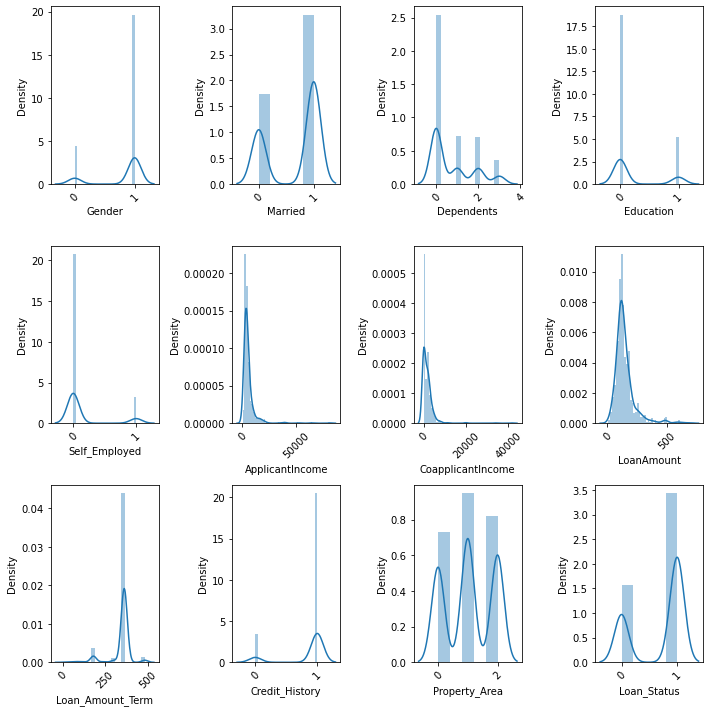

In [29]:
a=3
b=4
c=1
fig=plt.figure(figsize=(10,10))
for i in train.columns:
    plt.subplot(a,b,c)
    plt.xlabel(i)
    sns.distplot(train[i])
    plt.xticks(rotation=45)
    c=c+1
plt.tight_layout()
plt.show()

<AxesSubplot:>

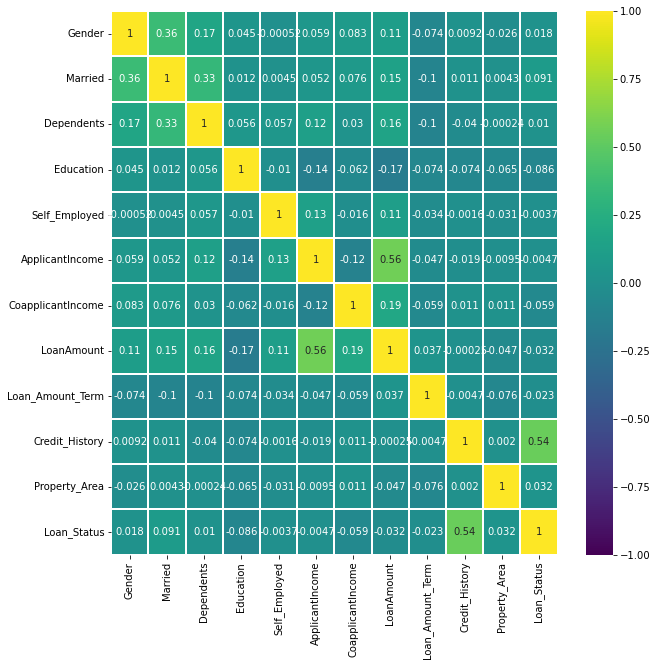

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(),annot=True,cmap="viridis",vmin=-1,vmax=1,linewidths=.1)

# choose ml model

1. Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
lr=LogisticRegression()

In [33]:
x=train.drop(['Loan_Status'],axis=1)

In [34]:
y=train.Loan_Status

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [37]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(491, 11)
(123, 11)
(491,)
(123,)


In [38]:
lr.fit(x_train,y_train)

LogisticRegression()

In [39]:
pred=lr.predict(x_test)

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [41]:
print(accuracy_score(pred,y_test)*100)

81.30081300813008


In [42]:
print(confusion_matrix(pred,y_test))

[[17  3]
 [20 83]]


In [43]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.46      0.85      0.60        20
           1       0.97      0.81      0.88       103

    accuracy                           0.81       123
   macro avg       0.71      0.83      0.74       123
weighted avg       0.88      0.81      0.83       123



In [44]:
from sklearn.model_selection import KFold,cross_val_score

In [45]:
kf=KFold(n_splits=5)

In [46]:
cv=cross_val_score(lr,x,y,cv=5)

In [47]:
cv

array([0.81300813, 0.77235772, 0.7804878 , 0.85365854, 0.81147541])

In [48]:
print(np.mean(cv)*100)

80.61975209916034


In [49]:
pred1=lr.predict(test)

In [50]:
pred1

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [51]:
final=pd.DataFrame({'Loan_Status':pred1})

In [52]:
final.replace(1,'Yes',inplace=True)

In [53]:
final.replace(0,'No',inplace=True)

In [54]:
final.to_csv("C:\\Users\\mevee\\Downloads\\loan_final.csv",index=False)